### Sección 12.6 problema 10

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in Python that you can
use to generate data. One example is the normal() method of
the random() function in numpy; the uniform() method is another
option. Be sure to add a mean shift to the observations in each
class so that there are three distinct classes.

In [17]:
# Generar datos aleatorios

Class1 = np.random.normal(loc=0, scale=1, size=(20, 50))
Class2 = np.random.normal(loc=3, scale=1, size=(20, 50))
class3 = np.random.normal(loc=6, scale=1, size=(20, 50))

# Combinar los datos en un solo conjunto de datos

simulated_data = np.vstack((Class1, Class2, class3))

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors

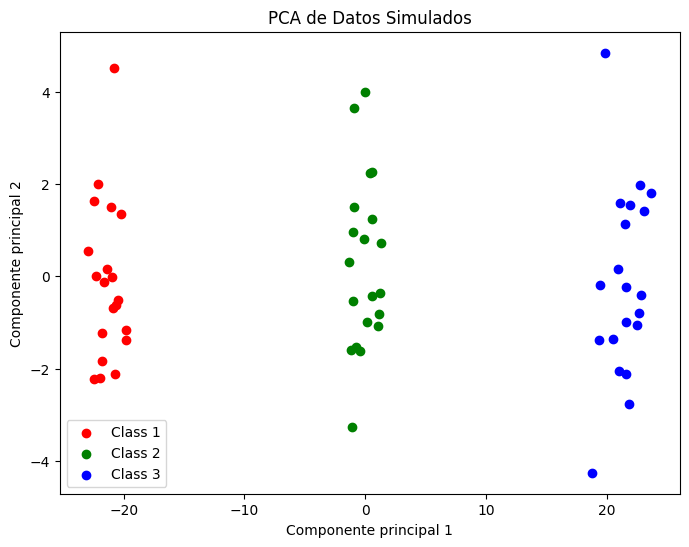

In [18]:
# Realizar PCA en los datos 
pca = PCA(n_components=2)
pca_result = pca.fit_transform(simulated_data)

# Crear un gráfico de dispersión de los datos proyectados en las dos primeras componentes principales
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
for i in range(3):
    plt.scatter(pca_result[i*20:(i+1)*20, 0], pca_result[i*20:(i+1)*20, 1], c=colors[i], label='Class {}'.format(i+1))
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.title("PCA de Datos Simulados")
plt.legend()
plt.show()


(c) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels? Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same

In [24]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_1 = KMeans(n_clusters=3)
KMeans_1.fit(simulated_data)
cluster_labels = KMeans_1.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)
print(crosstab)

col_0   0   1   2
row_0            
0       0  20   0
1      20   0   0
2       0   0  20


/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


La tabla de contingencia que se genera muestra que los clusters obtenidos mediante K-means se alinean perfectamente con las las clases verdaderas. Cada una de las tres clases verdaderas tienen un cluster correspondiente en la tabla y todas las observaciones en cada cluster peternecen a la misla clase verdadera.


(d) Perform K-means clustering with K = 2 . Describe your results

In [20]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_2 = KMeans(n_clusters=2)
KMeans_2.fit(simulated_data)
cluster_labels = KMeans_2.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0   0   1
row_0        
0       0  20
1       0  20
2      20   0


/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


La tabla de contigencia nos muestra que los cluster obtenidos utilizando K = 2 no se alinean perfectamente con las clases verdaderas. La clase verdadera 0 se divide en dos clusters, uno con 20 observaciones y otro con 0 observaciones, mientras que la clase verdadera 1 se divide en dos clusters, uno con 0 observaciones y otros con 20 observaciones. La clase verdadera 2 se asigna complentamente a un solo cluster.

(e) Perform K-means clustering with K = 4 . Describe your results

In [21]:
# Realizar K-means clustering en los datos proyectados en las dos primeras componentes principales

KMeans_3 = KMeans(n_clusters=4)
KMeans_3.fit(simulated_data)
cluster_labels = KMeans_3.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0  0   1   2   3
row_0               
0      0  20   0   0
1      0   0  20   0
2      7   0   0  13


/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Esto demuestra qye ek akgoritmo K means con K= 4 no ha sido capaz de identificar correctamente las tres clases distintas en los datos simulados. 

(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

In [22]:
#Realizar K-means clustering en los dos primeros vectores de puntuación de PCA
Kmeans_pca = KMeans(n_clusters=3)
Kmeans_pca.fit(pca_result)
cluster_labels = Kmeans_pca.labels_

# Comparar los resultados de clustering con las etiquetas de clase verdaderas.

true_labels = np.repeat(np.arange(3), 20)
crosstab = pd.crosstab(true_labels, cluster_labels)

print(crosstab)

col_0   0   1   2
row_0            
0      20   0   0
1       0   0  20
2       0  20   0


/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Utilizando el metodo de PCA (Disminución de dimensionalidad ), la tabla de contingencia que se genera muestra que los clusters obtenidos mediante K-means se alinean perfectamente con las las clases verdaderas. Cada una de las tres clases verdaderas tienen un cluster correspondiente en la tabla y todas las observaciones en cada cluster peternecen a la misla clase verdadera.

(g) Using the StandardScaler() estimator, perform K-means clustering with K = 3 on the data after scaling each variable to have
standard deviation one. How do these results compare to those
obtained in (b)? Explain.


In [31]:
# Realizar K-means clustering en los dato originales del punto b

Kmeans_original = KMeans(n_clusters=3)
Kmeans_original.fit(simulated_data)
cluster_labels_original = Kmeans_original.labels_

# Calcular la inercia y el de Silhouette para los resultados de clustering en los datos originales

inertia_oroginal = Kmeans_original.inertia_
silhouette_original = silhouette_score(simulated_data, cluster_labels_original)

# Crear una instancia de StandardScaler y realizar el escalado estándar de los datos simulados
scaler = StandardScaler()

# Escalar los datos del punto g
scaled_data = scaler.fit_transform(simulated_data)

# Realizar K-means clustering en los datos escalados

kmeans_scaled = KMeans(n_clusters=3)
kmeans_scaled.fit(scaled_data)
cluster_labels_scaled = kmeans_scaled.labels_

## Calcular la inercia y el de Silhouette para los resultados de clustering en los datos escalados

inertia_scaled = kmeans_scaled.inertia_
silhouette_scaled = silhouette_score(scaled_data, cluster_labels_scaled)

# Comparar las metricas de evaluación de clustering en los datos originales y escalados

print("Inercia de los datos originales: ", inertia_oroginal)
print("Inercia de los datos escalados: ", inertia_scaled)
print("Silhouette de los datos originales: ", silhouette_original)
print("Silhouette de los datos escalados: ", silhouette_scaled)

Inercia de los datos originales:  2858.2397454967872
Inercia de los datos escalados:  407.0230171553025
Silhouette de los datos originales:  0.5710172809789442
Silhouette de los datos escalados:  0.5699263766989472


/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/david/.local/share/virtualenvs/Taller2_Estadistica-I7qSmF5G/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Los resultados indican que la estandarización de los datos tuvo un impacto significativo en la estructura de los clusters. La inercia de los datos escalados es mucho menor que la de los datos originales, lo que sugiere que los clusters escalados están más densamente agrupados que los datos originales. (Una incercia más baja indica que los puntos dentro de cada cluster están más cerca de sus respectivos centroides). Sin embargo, el índice de Silueta para los datos escalados es ligeramente menor que el de los datos originales, lo que sugiere que los clusters escalados pueden no ser tan bien definidos como los originales. Aun así, dio más cercano a 0